# Tennis Ace : Challenge Project

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# load and investigate the data here:
df=pd.read_csv("tennis_stats.csv")
print(df.head())
print(df.describe())
print(df.info())
# perform exploratory analysis here:
#plotting pairplots and heatmaps for choosing right predictors

# Compute the correlation matrix
selected_coloumns=["FirstServe", "FirstServePointsWon", "FirstServeReturnPointsWon", "SecondServePointsWon", "SecondServeReturnPointsWon", "Aces", "BreakPointsConverted", "BreakPointsFaced", "BreakPointsOpportunities", "BreakPointsSaved", "DoubleFaults", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "ServiceGamesPlayed", "ServiceGamesWon", "TotalPointsWon", "TotalServicePointsWon", "Wins"]
corr_matrix = df[selected_coloumns].corr()


                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

### Now Lets begin with EDA
- First lets plot heatmap to see which which columns are affect wins column
- Along with that check for multicollinearty in the future multiple regression
- Choose a strongly related feature for linear regression model

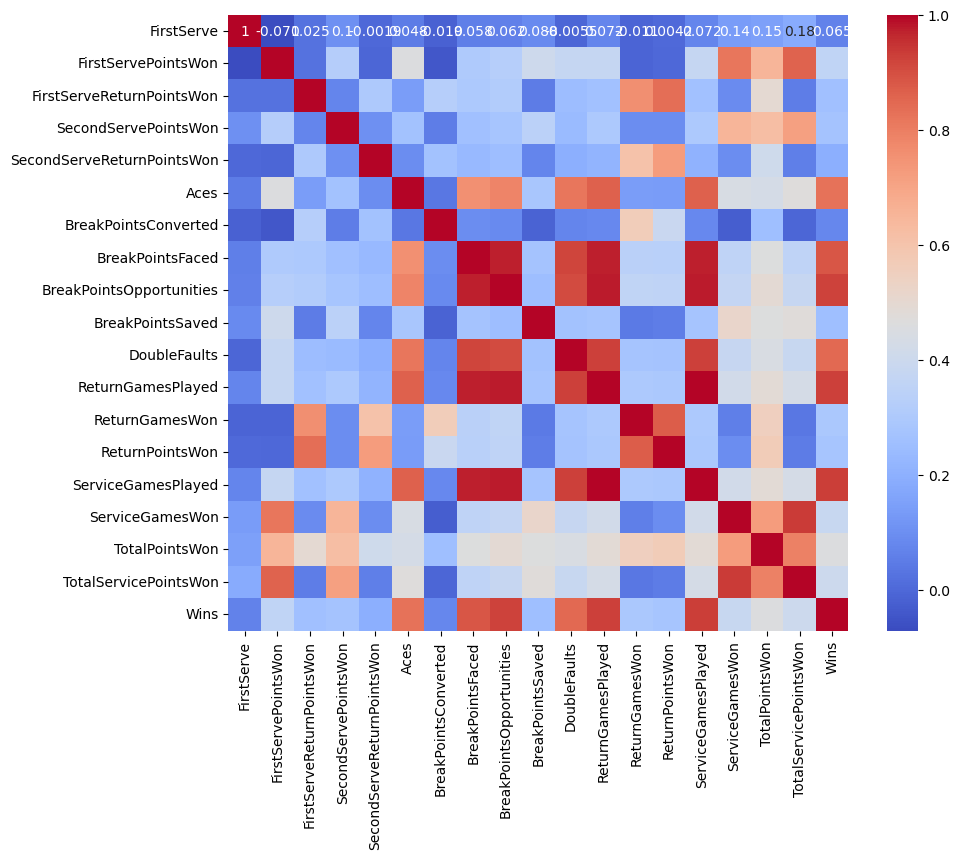

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [3]:
plt.figure(figsize=(10,8))
""" wins_corr = corr_matrix['Wins'].drop('Wins')
wins_corr_df = wins_corr.to_frame() """
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
plt.close


### My Observations:
- BreakpointsOpportunities seem to have a suprisingly strong correlation with wins I would like to extend that feature into the model
- Double faults too suprisingly seems to have strong correlation
- I can't take both together into a multiple regression model because they have strong correlation in between them too
- Aces too follows similar to Double faults.

0.8149486968688099


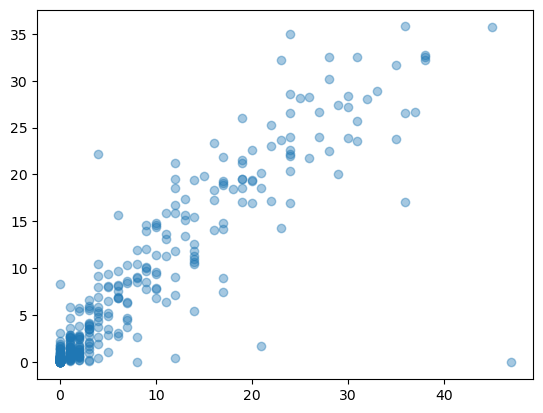

In [4]:
#Before we make a linear regression model let's divide our dataset

features = df[['BreakPointsOpportunities']]
outcome = df[["Wins"]]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,outcome_train)
sc=model.score(features_test,outcome_test)
print(sc)
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()
plt.close()

### My Observations:
- This shows a postive correlation between break points oppurtunities and wins - looks as a strong relationship
- The points are more grouped at the bottom of the graph compared at the higher values.
- The previous observation may indicate that the break point oppurtunities and wins are highly realted for small values.


Similary Lets build LR models for both aces vs wins and double faults vs wins

0.747051253564511


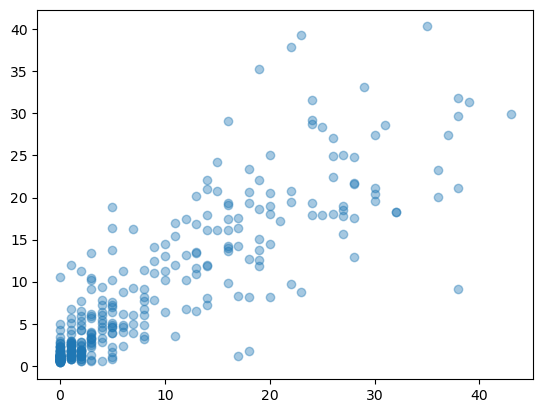

In [5]:
#Double faults vs wins

feat=df[['DoubleFaults']]
out=df[['Wins']]

feat_train,feat_test,out_train,out_test=train_test_split(feat,out,train_size=0.8)
lr=LinearRegression()
lr.fit(feat_train,out_train)
sco=lr.score(feat_test,out_test)
print(sco)
prediction=lr.predict(feat_test)
plt.scatter(out_test,prediction,alpha=0.4)
plt.show()
plt.close()

### My observations
- The graph tells us that there is a positve correlation between double faults and wins
- The clustering at the bottom again tells us that there is a strong correlation for small values of wins and double faults
- This can be improved by adding additional factors

0.6390263108635102


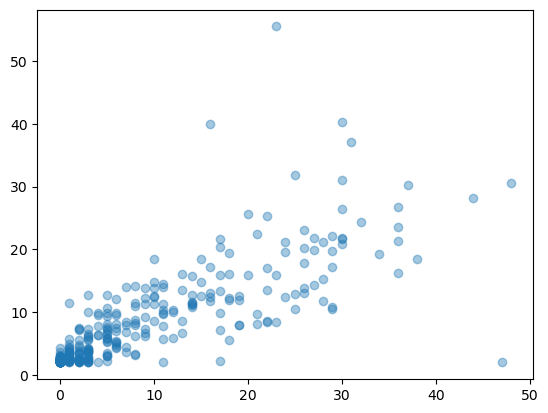

In [6]:
#Aces vs Wins


feat=df[['Aces']]
out=df[['Wins']]

feat_train,feat_test,out_train,out_test=train_test_split(feat,out,train_size=0.8)
lr=LinearRegression()
lr.fit(feat_train,out_train)
sco=lr.score(feat_test,out_test)
print(sco)
prediction=lr.predict(feat_test)
plt.scatter(out_test,prediction,alpha=0.4)
plt.show()
plt.close()

### My observations
- This shows a positive correlation between wins and Aces
- The graph isn't exactly linear the spread of the points from the diagonal line is high.The R squared score is also not high enough.
- Alone Aces is not the best predictor for number of wins.

## Multiple Linear Regression

Now lets try to build some multiple linear regression models to enhance the accuracy of our predictions

Firstly let's build a few models using 2 features to predict early earnings.Let's plot a heatmap and check for the highly correlated values


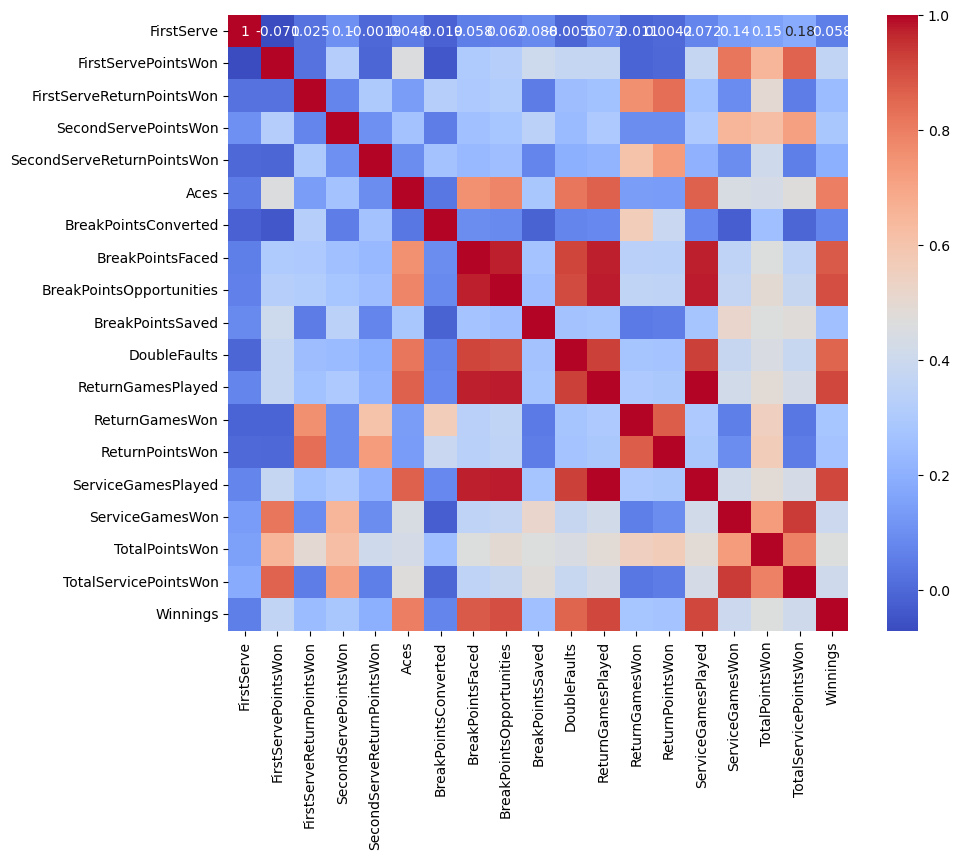

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [7]:
#Selecting all the features and winnings as outcome

selected_coloumns=["FirstServe", "FirstServePointsWon", "FirstServeReturnPointsWon", "SecondServePointsWon", "SecondServeReturnPointsWon", "Aces", "BreakPointsConverted", "BreakPointsFaced", "BreakPointsOpportunities", "BreakPointsSaved", "DoubleFaults", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "ServiceGamesPlayed", "ServiceGamesWon", "TotalPointsWon", "TotalServicePointsWon", "Winnings"]
corr_matrix = df[selected_coloumns].corr()

#Plotting the heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
plt.close

## Choosing pairs of features to predict winnings

- TotalPointsWon,Double faults Vs Winnings
- Aces,Double faults Vs Winnings (Both have high correlation but let's try)
- BreakPointsOpportunities,Aces Vs Winnings


In [8]:
#First pair of features
x=df[['TotalPointsWon','DoubleFaults']]
y=df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

dlr=LinearRegression()

model=dlr.fit(x_train,y_train)

y_predict=dlr.predict(x_test)
print(model.coef_)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the first model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")

#The next pair of features
x=df[['Aces','DoubleFaults']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
dlr=LinearRegression()
model=dlr.fit(x_train,y_train)
y_predict=dlr.predict(x_test)
print(model.coef_)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the second model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")

#The Last pair of features
x=df[['Aces','BreakPointsOpportunities']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
dlr=LinearRegression()
model=dlr.fit(x_train,y_train)
y_predict=dlr.predict(x_test)
print(model.coef_)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the third model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")


[[691846.37026478   3621.7678966 ]]
Score of the first model:0.698731019052549
The mean squared error:21637356035.695023
The mean absolute error:90783.76364556074
[[ 580.3234193  2689.01004956]]
Score of the second model:0.710079502126786
The mean squared error:20822299776.10235
The mean absolute error:88412.94154054196
[[ 471.6990364  1433.32496126]]
Score of the third model:0.8218888075656878
The mean squared error:12792074618.912098
The mean absolute error:70777.1587066381


## Observations

+ The third model is the best of the three
+ To my suprise this is not what I expected I expected the first model to perform the best then the third and finally the second as they second and third models had correlation between them.
+ Let's check if correlation effects the models performance or not add another model with features as BreakPoinstOppurtunities,Return games played Vs Winnings and test it.


In [9]:
# BreakPointsOppurtunities,Return games played Vs Winnings

x=df[['BreakPointsOpportunities','ReturnGamesPlayed']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
dlr=LinearRegression()
model=dlr.fit(x_train,y_train)
y_predict=dlr.predict(x_test)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the fourth model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")


Score of the fourth model:0.8306230858924168
The mean squared error:12164772434.412546
The mean absolute error:67577.82206520617


## Observations
+ The correlation between them didn't decrease the accuracy
+ This might indicate the the relationship with winnings might be stronger than the relationship between them

Next lets create multivalued linear regression to predict earnings.

In [10]:
# Creating a multiple linear regression to predict earnings

x=df[['BreakPointsOpportunities',"ReturnGamesPlayed",'Aces',"DoubleFaults"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
mlr=LinearRegression()
model=mlr.fit(x_train,y_train)
y_predict=mlr.predict(x_test)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")


Score of the model:0.8259160356500655
The mean squared error:12502836186.118286
The mean absolute error:68858.8704943137


In [11]:
# The score decreased let's remove aces and doublefaults played and add totalpointswon
x=df[['BreakPointsOpportunities',"ReturnGamesPlayed","TotalPointsWon"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
mlr=LinearRegression()
model=mlr.fit(x_train,y_train)
y_predict=mlr.predict(x_test)
m_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(f"Score of the model:{m_score}\nThe mean squared error:{mse}\nThe mean absolute error:{mae}")

Score of the model:0.8302394954673962
The mean squared error:12192322176.08178
The mean absolute error:67416.74887154347


# Comparision


Let's evaluate the model give by CodeCademy with our best working model i.e model with paramenters as : 'BreakPointsOpportunities',ReturnGamesPlayed","TotalPointsWon"

In [14]:
#We already know the score,mean squared error and mean absolute error of our model let's find these out for the parameters codecademy used

features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]
f_train,f_test,o_train,o_test=train_test_split(features,outcome,train_size=0.8,test_size=0.2)
mlr=LinearRegression()
model=mlr.fit(f_train,o_train)
predictions=mlr.predict(f_test)
sc=r2_score(o_test,predictions)
ms = mean_squared_error(o_test, predictions)
ma = mean_absolute_error(o_test, predictions)
print(f"Score of the model:{sc}\nThe mean squared error:{ms}\nThe mean absolute error:{ma}")

Score of the model:0.8433805891794737
The mean squared error:9572548166.759352
The mean absolute error:59510.936909533586


## Conclusion

The CodeCademy's model performed better in comparision to mine as the error is smaller and the score is slightly higher